In [1]:
#Importing main library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\Study\BA\TEST\musk_csv.csv")

In [4]:
#looking into the data

In [5]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [6]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [8]:
data.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [9]:
#delete the variable which dose not seems to be needed

In [10]:
data = data.drop(['ID','molecule_name','conformation_name'],axis=1)

In [11]:
#finding out the Outliers

In [12]:
object = ['object']
cat = data.select_dtypes(object)

In [13]:
cat.columns

Index([], dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 167 entries, f1 to class
dtypes: int64(167)
memory usage: 8.4 MB


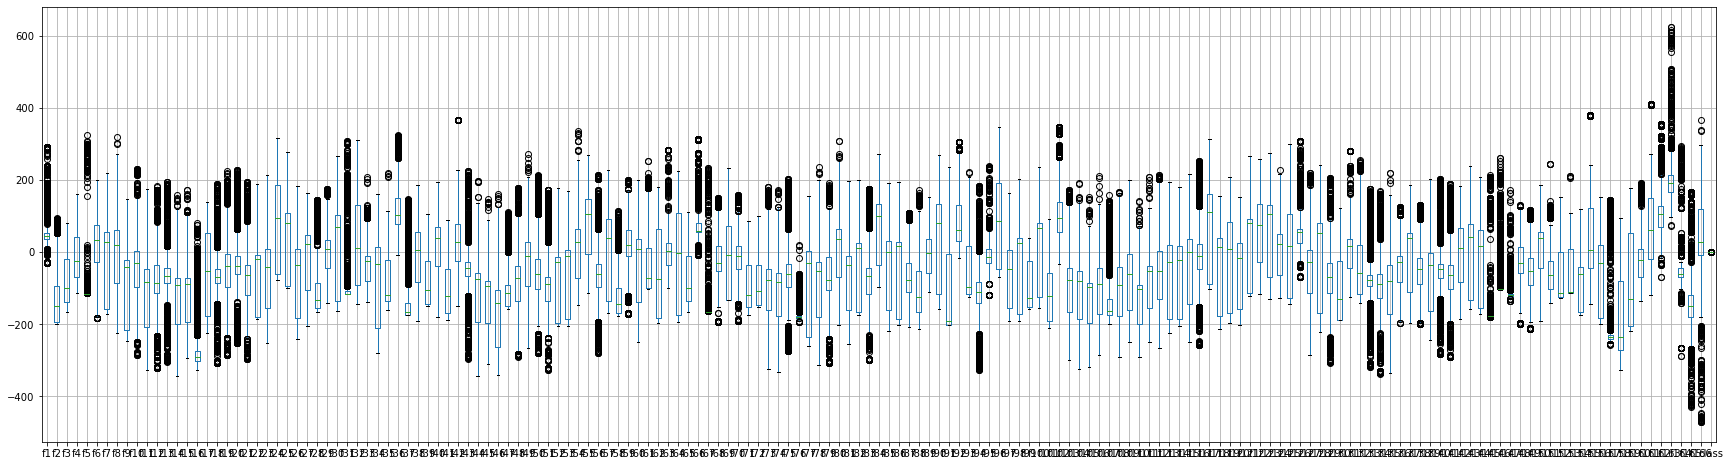

In [15]:
data.boxplot(figsize=(30,8))

In [16]:
#Fixing of Outlier

In [17]:
data1 = data.drop(['class'],axis=1)

In [18]:
#outlier Treatment
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

In [19]:
data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
data1['class'] = data['class'].astype(int)

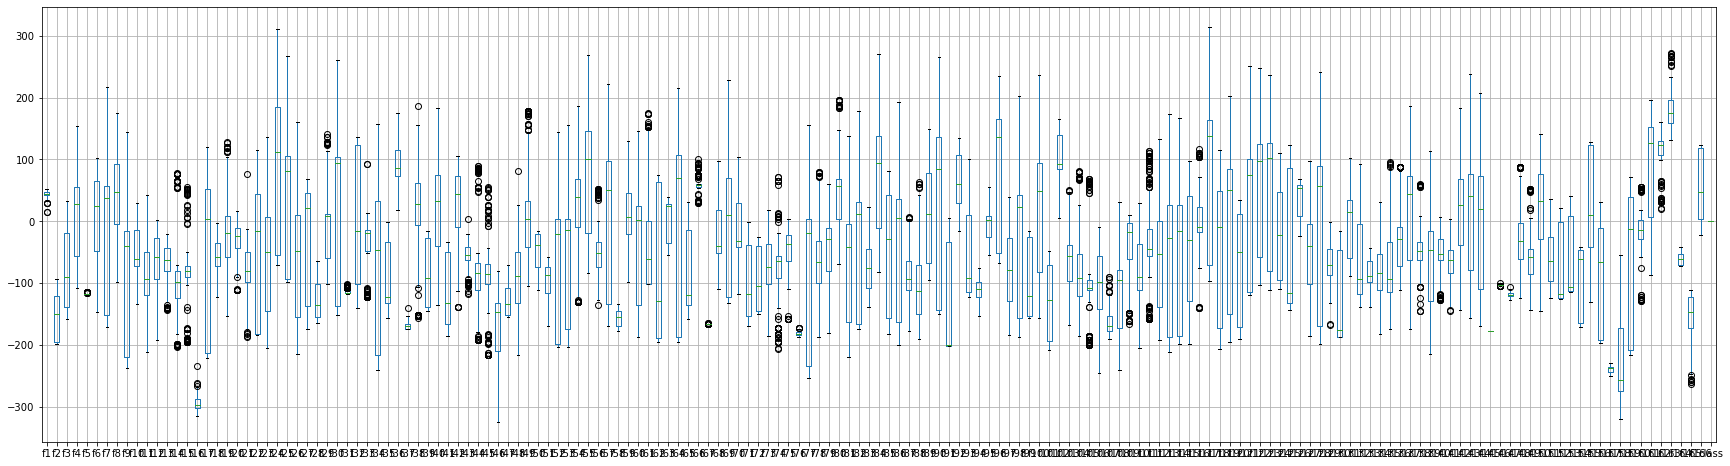

In [21]:
data1.boxplot(figsize=(30,8))

In [22]:
#making model

In [23]:
X = data1.drop(['class'],axis=1)
Y = data1['class']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)

In [25]:
#setting Hyper-parameters

In [26]:
params={
    "n_estimators"  : [100,200,300],
    "max_depth"     : [4,6,8,10],
    "learning_rate"  : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "min_child_weight" : [ 1, 3, 5, 7],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [28]:
classifier=XGBClassifier()

In [29]:
random_search=RandomizedSearchCV(classifier,param_distributions=params)

In [31]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [32]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
random_search.best_params_

{'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [34]:
#applying best variables

In [35]:
classifier=XGBClassifier(
n_estimators=100,
min_child_weight=1, 
max_depth=4, 
learning_rate=0.01,
gamma=0.3, 
colsample_bytree=0.5)

In [37]:
model = classifier
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.07194	validation_0-logloss:0.68649	validation_1-error:0.05714	validation_1-logloss:0.68603
[1]	validation_0-error:0.05036	validation_0-logloss:0.67907	validation_1-error:0.02857	validation_1-logloss:0.67827
[2]	validation_0-error:0.00719	validation_0-logloss:0.67200	validation_1-error:0.02857	validation_1-logloss:0.67117
[3]	validation_0-error:0.05036	validation_0-logloss:0.66567	validation_1-error:0.05714	validation_1-logloss:0.66440
[4]	validation_0-error:0.01439	validation_0-logloss:0.65942	validation_1-error:0.05714	validation_1-logloss:0.65814
[5]	validation_0-error:0.02158	validation_0-logloss:0.65302	validation_1-error:0.05714	validation_1-logloss:0.65186
[6]	validation_0-error:0.00719	validation_0-logloss:0.64582	validation_1-error:0.00000	validation_1-logloss:0.64518
[7]	validation_0-error:0.00719	validation_0-logloss:0.63875	validation_1-error:0.02857	validation_1-logloss:0.63802
[8]	validation_0-error:0.01439	validation_0-logloss:0.63202	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
result = model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(result, y_test)

In [41]:
accuracy

1.0

In [42]:
view = pd.DataFrame(result,y_test)

In [43]:
view.head(10)

,0
class,
1,1
0,0
0,0
1,1
1,1
0,0
1,1
1,1
0,0


In [44]:
scoretrain = model.score(x_train,y_train)

In [45]:
scoretrain

1.0

In [46]:
scoretest = model.score(x_test,y_test)

In [47]:
scoretest

1.0

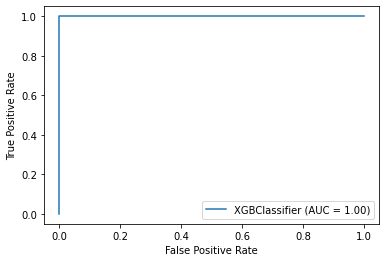

In [48]:
#Ploting Area under the Curve
from sklearn.metrics import plot_roc_curve
xgbgraph = plot_roc_curve(model, x_test, y_test)
xgbgraph

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_test,result)

In [51]:
cm

array([[20,  0],
       [ 0, 15]], dtype=int64)

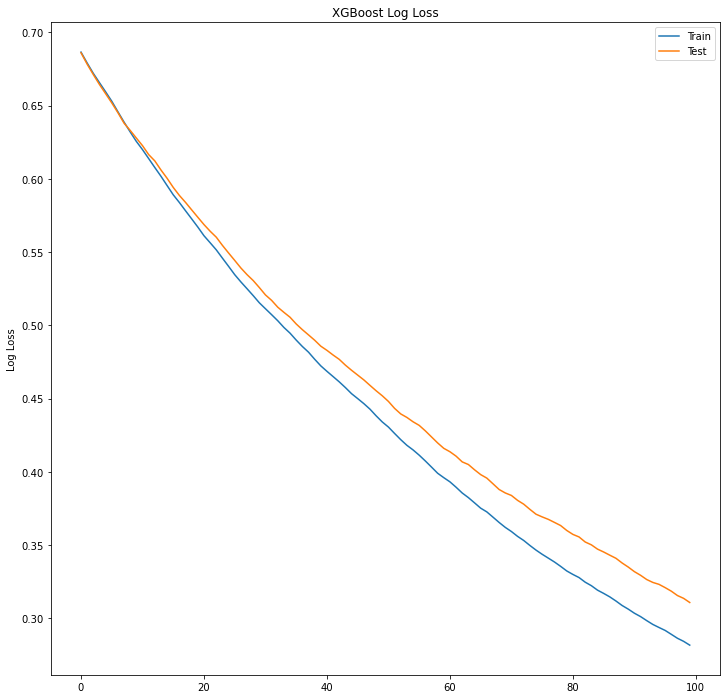

In [54]:
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # plot log loss
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()

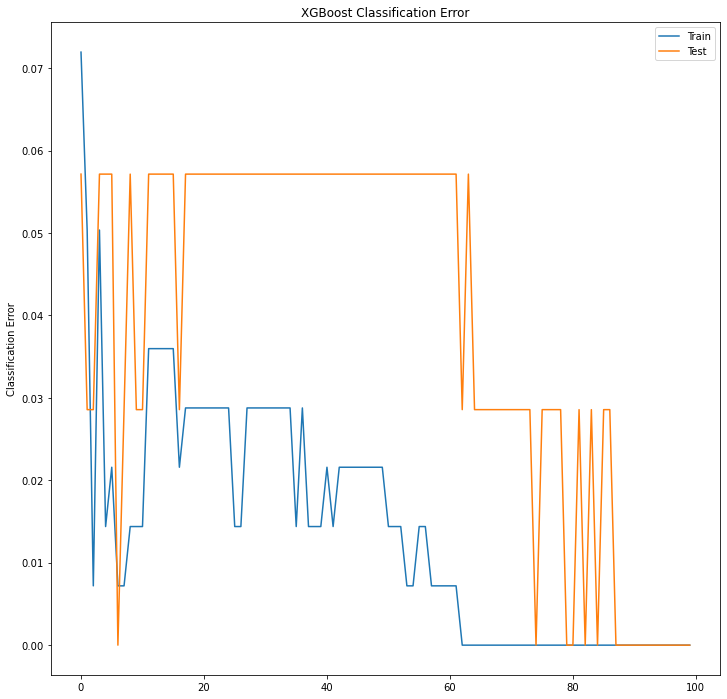

In [55]:
    # plot classification error
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()